In [1]:
import numpy as np
import pandas as pd
from statsmodels.stats.anova import AnovaRM
  
# Create the data
dataframe = pd.DataFrame({'Cars': np.repeat([1, 2, 3, 4, 5], 4),
                          'Oil': np.tile([1, 2, 3, 4], 5),
                          'Mileage': [36, 38, 30, 29,
                                      34, 38, 30, 29,
                                      34, 28, 38, 32,
                                      38, 34, 20, 44,
                                      26, 28, 34, 50]})


In [2]:
display(dataframe)
display(dataframe.columns)

,Cars,Oil,Mileage
0,1,1,36
1,1,2,38
2,1,3,30
3,1,4,29
4,2,1,34
5,2,2,38
6,2,3,30
7,2,4,29
8,3,1,34
9,3,2,28


Index(['Cars', 'Oil', 'Mileage'], dtype='object')

## Provide a full analysis using repeated-measures ANOVA to determine if there is a difference in mileage of cars between four engine oils.

In [3]:
# Perform the repeated measures ANOVA
anova_results = AnovaRM(data=dataframe, depvar='Mileage', subject='Cars', within=['Oil']).fit()

# Display the results
anova_results.summary()

,F Value,Num DF,Den DF,Pr > F
Oil,0.5679,3.0000,12.0000,0.6466


The repeated-measures ANOVA analysis conducted on the dataset comparing the mileage of cars using four different engine oils yielded the following results:

F Value: 0.5679
Degrees of Freedom (Num DF) for the effect: 3.0000
Degrees of Freedom (Den DF) for the error: 12.0000
p-value (Pr > F): 0.6466
These results indicate that there is no statistically significant difference in the mileage of cars when using the four different engine oils, as the p-value (0.6466) is greater than the conventional threshold of 0.05. This suggests that the type of engine oil does not significantly affect the mileage of the cars in this study. 

## Check the assumptions underlying the said ANOVA type.

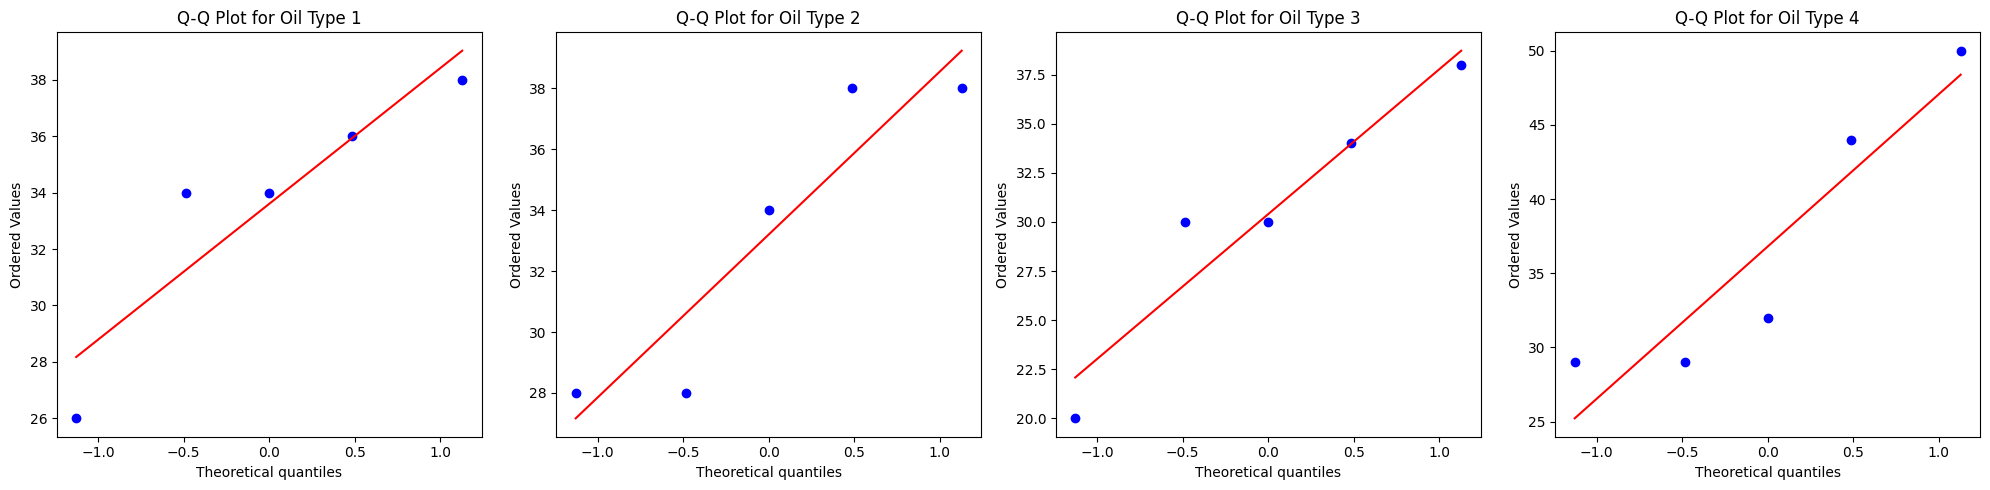

{1: 0.22791993618011475,
 2: 0.1054743230342865,
 3: 0.6155813932418823,
 4: 0.14718401432037354}

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
# Check for normality in each group
normality_checks = {}
for oil_type in dataframe['Oil'].unique():
    mileage_data = dataframe[dataframe['Oil'] == oil_type]['Mileage']
    w, p_value = stats.shapiro(mileage_data)
    normality_checks[oil_type] = p_value

# Plotting Q-Q plots for visual inspection of normality
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, oil_type in enumerate(dataframe['Oil'].unique()):
    stats.probplot(dataframe[dataframe['Oil'] == oil_type]['Mileage'], dist="norm", plot=axs[i])
    axs[i].set_title(f'Q-Q Plot for Oil Type {oil_type}')

plt.tight_layout()
plt.show()

normality_checks


In [5]:
from scipy.stats import levene

# Conducting Levene's test for homogeneity of variances
levene_test_results = levene(dataframe[dataframe['Oil'] == 1]['Mileage'],
                             dataframe[dataframe['Oil'] == 2]['Mileage'],
                             dataframe[dataframe['Oil'] == 3]['Mileage'],
                             dataframe[dataframe['Oil'] == 4]['Mileage'])

levene_test_results


LeveneResult(statistic=0.7321365716297078, pvalue=0.5478418985023898)


For a repeated-measures ANOVA, several key assumptions must be met to ensure the validity of the results. Here are the main assumptions and how they can be checked:

Normality: The dependent variable should be approximately normally distributed for each group of the within-subjects factor. This assumption can be tested using methods like the Shapiro-Wilk test for normality, or visually inspected using Q-Q plots or histograms for each group.

Independence of Observations: Each subject should belong to only one group and the observations within each group must be independent. This is more about the study design and less about something that can be statistically tested. Ensuring proper randomization and control of external factors is vital.

Homogeneity of Variances: While less critical in repeated-measures designs compared to between-groups ANOVAs, it's still important to ensure that the variances of differences between groups are similar across all levels of the within-subjects factor.

No Significant Outliers: Outliers can have a particularly strong effect on repeated-measures ANOVA. They can be detected using box plots or statistical tests.

### The Shapiro-Wilk test results for normality, along with the Q-Q plots for each oil type, provide insights into the normality assumption:

Oil Type 1: Shapiro-Wilk p-value = 0.228

Oil Type 2: Shapiro-Wilk p-value = 0.105

Oil Type 3: Shapiro-Wilk p-value = 0.616

Oil Type 4: Shapiro-Wilk p-value = 0.147

In all cases, the p-values are greater than 0.05, which suggests that the mileage data for each oil type does not significantly deviate from a normal distribution. This is supported by the Q-Q plots, where the points roughly follow the line, indicating a normal distribution.



The other assumptions, such as independence of observations and no significant outliers, are more related to study design and data collection methods, and they typically require domain knowledge and careful examination of the experimental setup and data collection process.

### Levene's test for homogeneity of variances

Levene's test for homogeneity of variances across the different oil types yielded the following results:

Test Statistic: 0.7321

p-value: 0.5478

The p-value is greater than the conventional alpha level of 0.05, indicating that there is no significant evidence to suggest a violation of the homogeneity of variances assumption. This means that the variances in mileage across the different oil types are similar, supporting the use of repeated-measures ANOVA in the analysis.

## Conclusion


In conclusion, the repeated-measures ANOVA conducted to compare the mileage of cars using four different engine oils revealed no significant difference in mileage across the oils. The ANOVA results showed a p-value well above the conventional threshold (p = 0.6466), suggesting that the type of engine oil does not have a statistically significant impact on car mileage in this specific study.